In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
df=pd.read_csv('CarPrice_Assignment.csv')

In [3]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [4]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print("----------------------------------------------")

car_ID
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205]
----------------------------------------------
symboling
[ 3  1  2  0 -1 -2]
----------------------------------------------
CarName
['alfa-romero giulia' 'alfa-

In [5]:
df1=df.drop(columns=['car_ID','CarName'])

In [6]:
df2=pd.get_dummies(df1,columns=['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem'])

In [7]:
df1.shape

(205, 24)

In [8]:
df2.shape

(205, 53)

In [9]:
df2.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'fueltype_diesel', 'fueltype_gas', 'aspiration_std', 'aspiration_turbo',
       'doornumber_four', 'doornumber_two', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_front', 'enginelocation_rear', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_eight',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_m

In [13]:
matrix = df2.corr()
print("Correlation matrix is : ")
coor_ds=pd.DataFrame(matrix)
coor_ds

Correlation matrix is : 


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,...,-0.047012,0.245950,-0.037911,-0.034069,0.212471,-0.194311,0.122067,0.012532,0.181939,0.065707
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,...,0.037803,-0.081174,-0.191073,-0.396505,-0.070124,0.308346,-0.033294,0.348891,-0.117359,-0.032129
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,...,0.100413,-0.057877,-0.297330,-0.487237,-0.049998,0.212679,-0.004831,0.511374,-0.079790,-0.008245
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,...,0.153516,-0.013699,-0.194078,-0.522594,-0.011834,0.233880,0.012832,0.461896,-0.046399,-0.023158
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,...,-0.170181,-0.238720,-0.035289,-0.079418,-0.206225,0.284631,-0.101245,0.108685,-0.278615,-0.066778
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,...,0.187964,-0.039196,-0.233857,-0.577159,-0.040801,0.217275,0.034431,0.520220,-0.002434,0.024052
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,...,0.335555,-0.184762,-0.169349,-0.442562,-0.166946,0.069594,0.049033,0.483520,0.004490,-0.013327
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,...,0.054482,0.000127,-0.292226,-0.353342,0.000110,0.054451,0.070030,0.419335,-0.004213,0.025977
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,...,-0.110878,-0.000187,0.141194,-0.234866,-0.000162,0.241829,0.144263,-0.110280,0.251259,-0.005688
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,...,0.023986,-0.026436,-0.053911,-0.183384,-0.022838,0.984356,-0.055528,-0.311035,-0.153726,-0.016654


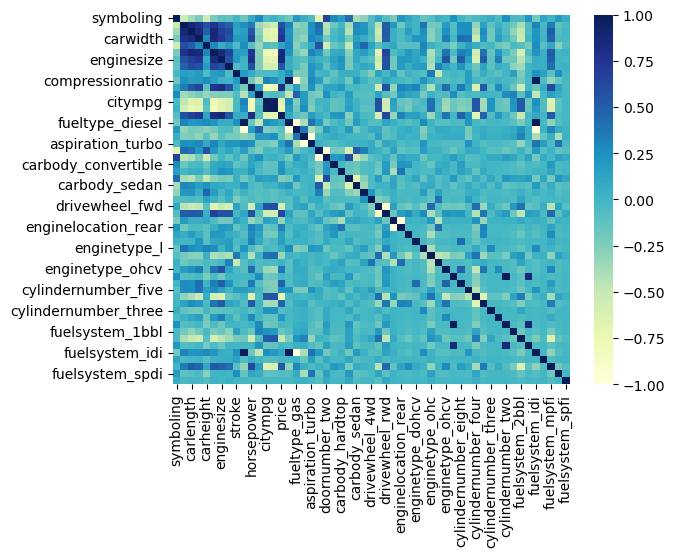

In [14]:
import matplotlib.pyplot as plt
dataplot = sns.heatmap(coor_ds, cmap="YlGnBu")
plt.show()

In [23]:
coor_ds.iloc[14,:]>0.5 

symboling                False
wheelbase                 True
carlength                 True
carwidth                  True
carheight                False
curbweight                True
enginesize                True
boreratio                 True
stroke                   False
compressionratio         False
horsepower                True
peakrpm                  False
citympg                  False
highwaympg               False
price                     True
fueltype_diesel          False
fueltype_gas             False
aspiration_std           False
aspiration_turbo         False
doornumber_four          False
doornumber_two           False
carbody_convertible      False
carbody_hardtop          False
carbody_hatchback        False
carbody_sedan            False
carbody_wagon            False
drivewheel_4wd           False
drivewheel_fwd           False
drivewheel_rwd            True
enginelocation_front     False
enginelocation_rear      False
enginetype_dohc          False
enginety

In [24]:
df2.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'fueltype_diesel', 'fueltype_gas', 'aspiration_std', 'aspiration_turbo',
       'doornumber_four', 'doornumber_two', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_front', 'enginelocation_rear', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_eight',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_m

### performing multiple rigression

In [25]:
X=df2.drop(columns='price')
y=df2['price']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

from sklearn.linear_model import LinearRegression
L=LinearRegression()

L.fit(X_train,y_train)

print(L.coef_)
print(L.intercept_)

y_pred=L.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error

print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

[ 8.43616051e+01  7.14185720e+00 -8.27743000e+01  7.72299602e+02
  1.14549388e+02  5.15351787e+00  1.15157079e+02 -1.47841650e+03
 -4.53890097e+03 -1.42775277e+03 -8.11687705e+00  2.49087542e+00
 -1.30699962e+02  2.06814922e+02  6.70082377e+03 -6.70082377e+03
 -6.47929583e+02  6.47929583e+02 -7.21327646e+01  7.21327646e+01
  2.79871947e+03 -1.22379343e+03 -7.27139975e+02  2.22124192e+02
 -1.06991027e+03 -1.17683611e+03 -1.57450061e+02  1.33428617e+03
 -3.82775855e+03  3.82775855e+03  7.44693668e+02 -3.37347037e+03
 -1.47697465e+03  4.27055120e+03  3.08298493e+03 -4.69741343e+03
  1.44962866e+03  4.33288513e+03 -3.90165992e+03 -4.99533595e+03
 -9.20922390e+02  5.52615390e+03 -1.49074942e+03  1.44962866e+03
 -7.24301290e+01  5.03935208e+01  1.44962866e+03  6.70082377e+03
 -3.41352048e+03 -3.59548898e+01 -3.57888741e+03 -1.10005303e+03]
-28950.35704758988
R2 score 0.900568000534212
RMSE 2407.634208668548


### The R2 score has increased from 80% to 90 % after we have considered all the new categorical data 

### Let us try if ridge regression still improves it

In [44]:
from sklearn.linear_model import Ridge
max_score=0
my_alpha=0
for i in range (100,20000,1):
    R=Ridge(alpha=i*0.001)
    R.fit(X_train,y_train)
    y_pred1=R.predict(X_test)
    if r2_score(y_test,y_pred1)*100>max_score:
        max_score=r2_score(y_test,y_pred1)*100
        my_alpha=i*0.001

   
#     print(i*0.001)
#     print("R2 score",r2_score(y_test,y_pred1)*100)
#     print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred1)))


print(my_alpha)
print(max_score)

0.328
90.59586079724426


## so for the alpha of 0.328 we can have the best R2 score of 90.56 